# Case Explanation

The objective of this project is to develop models that can predict metered building energy usage, having known the properties of the building itself and its environment. The data used for training are extracted from the following files: "train.csv", "building_meta.csv", and "weather_train.csv". Moreover, the data used for testing are extracted from the following files: "test.csv", building_meta.csv", and "weather_test.csv".

# Data Pre-Processing

## Data Merging

All of the data used for training are merged. 

In [1]:
# Preview the summary of the file "train.csv"
import pandas as pd
dt = pd.read_csv('/kaggle/input/ashrae-energy-prediction/train.csv', 
                 parse_dates = ['timestamp']) # "timestamp" data are converted to datetime
dt.info()
dt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype         
---  ------         -----         
 0   building_id    int64         
 1   meter          int64         
 2   timestamp      datetime64[ns]
 3   meter_reading  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 616.9 MB


,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,1,0,2016-01-01 00:00:00,0.000
2,2,0,2016-01-01 00:00:00,0.000
3,3,0,2016-01-01 00:00:00,0.000
4,4,0,2016-01-01 00:00:00,0.000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575


In [2]:
# Preview the summary of the file "building_meta.csv"
dt1 = pd.read_csv('/kaggle/input/ashrae-energy-prediction/building_metadata.csv')
dt1.info()
dt1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB


,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


In [3]:
# Merge the data
dt_merge = dt.join(dt1.set_index('building_id'), on = 'building_id')
dt_merge.info()
dt_merge

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   building_id    int64         
 1   meter          int64         
 2   timestamp      datetime64[ns]
 3   meter_reading  float64       
 4   site_id        int64         
 5   primary_use    object        
 6   square_feet    int64         
 7   year_built     float64       
 8   floor_count    float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 1.4+ GB


,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count
0,0,0,2016-01-01 00:00:00,0.000,0,Education,7432,2008.0,NaN
1,1,0,2016-01-01 00:00:00,0.000,0,Education,2720,2004.0,NaN
2,2,0,2016-01-01 00:00:00,0.000,0,Education,5376,1991.0,NaN
3,3,0,2016-01-01 00:00:00,0.000,0,Education,23685,2002.0,NaN
4,4,0,2016-01-01 00:00:00,0.000,0,Education,116607,1975.0,NaN
...,...,...,...,...,...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750,15,Entertainment/public assembly,19619,1914.0,NaN
20216096,1445,0,2016-12-31 23:00:00,4.825,15,Education,4298,NaN,NaN
20216097,1446,0,2016-12-31 23:00:00,0.000,15,Entertainment/public assembly,11265,1997.0,NaN
20216098,1447,0,2016-12-31 23:00:00,159.575,15,Lodging/residential,29775,2001.0,NaN


In [4]:
# Preview the summary of the file "weather_train.csv"
dt2 = pd.read_csv('/kaggle/input/ashrae-energy-prediction/weather_train.csv',
                 parse_dates = ['timestamp']) # "timestamp" data are converted to datetime
dt2.info()
dt2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   site_id             139773 non-null  int64         
 1   timestamp           139773 non-null  datetime64[ns]
 2   air_temperature     139718 non-null  float64       
 3   cloud_coverage      70600 non-null   float64       
 4   dew_temperature     139660 non-null  float64       
 5   precip_depth_1_hr   89484 non-null   float64       
 6   sea_level_pressure  129155 non-null  float64       
 7   wind_direction      133505 non-null  float64       
 8   wind_speed          139469 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 9.6 MB


,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6


In [5]:
# Merge the data
dt_merge = dt_merge.join(dt2.set_index(['site_id', 'timestamp']), 
                         on = ['site_id', 'timestamp'])
dt_merge.info()
dt_merge

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   building_id         int64         
 1   meter               int64         
 2   timestamp           datetime64[ns]
 3   meter_reading       float64       
 4   site_id             int64         
 5   primary_use         object        
 6   square_feet         int64         
 7   year_built          float64       
 8   floor_count         float64       
 9   air_temperature     float64       
 10  cloud_coverage      float64       
 11  dew_temperature     float64       
 12  precip_depth_1_hr   float64       
 13  sea_level_pressure  float64       
 14  wind_direction      float64       
 15  wind_speed          float64       
dtypes: datetime64[ns](1), float64(10), int64(4), object(1)
memory usage: 2.4+ GB


,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.000,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.000,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.000,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.000,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.000,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750,15,Entertainment/public assembly,19619,1914.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216096,1445,0,2016-12-31 23:00:00,4.825,15,Education,4298,NaN,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216097,1446,0,2016-12-31 23:00:00,0.000,15,Entertainment/public assembly,11265,1997.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216098,1447,0,2016-12-31 23:00:00,159.575,15,Lodging/residential,29775,2001.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8


## Feature Engineering - Date and Time
The "timestamp" data are separated into the "hour", "day of week", "week", and "month" data—representing the time when the data were taken. Those separated data are converted through sinus and cosinus functions because those functions represent periodic data better.

In [6]:
# Add features of date and time
import numpy as np

hour = dt_merge['timestamp'].dt.hour
dayofweek = dt_merge['timestamp'].dt.dayofweek
week = dt_merge['timestamp'].dt.isocalendar().week.astype(int)
month = dt_merge['timestamp'].dt.month
dt_merge['is_weekend'] = (dayofweek > 4).astype(int)

dt_merge['hour_sin'] = np.sin(2 * np.pi * hour / 24) 
dt_merge['hour_cos'] = np.cos(2 * np.pi * hour / 24)
dt_merge['dayofweek_sin'] = np.sin(2 * np.pi * dayofweek / 7)
dt_merge['dayofweek_cos'] = np.cos(2 * np.pi * dayofweek / 7)
dt_merge['week_sin'] = np.sin(2 * np.pi * week / 52)
dt_merge['week_cos'] = np.cos(2 * np.pi * week / 52)
dt_merge['month_sin'] = np.sin(2 * np.pi * month / 12)
dt_merge['month_cos'] = np.cos(2 * np.pi * month / 12)

In [7]:
# Erase 'timestamp' column
dt_merge = dt_merge.drop('timestamp', axis=1)
dt_merge.shape

(20216100, 24)

## Feature Engineering - Building Properties
"Building Age"  and "space" data are added, representing the age and the total occupied area of the building. 

In [8]:
# Add features of building properties
dt_merge['building_age'] = 2019 - dt_merge['year_built']
dt_merge['space'] = dt_merge['square_feet'] * dt_merge['floor_count']

In [9]:
# Erase 'year_built' column
dt_merge = dt_merge.drop('year_built', axis=1)
dt_merge.shape

(20216100, 25)

## Feature Engineering - Meteorological Properties
"Relative Humidity" and "Apparent Temperature" data are added, which are calculated using MetPy library.


In [10]:
# Import library
!pip install metpy

from metpy.calc import relative_humidity_from_dewpoint, apparent_temperature
from metpy.units import pandas_dataframe_to_unit_arrays, units

In [11]:
# Convert air temperature, dew temperature, and wind speed unit
dt_met = pandas_dataframe_to_unit_arrays(
    dt_merge[['air_temperature', 'dew_temperature', 'wind_speed']],
    column_units={
        'air_temperature': units.degC,
        'dew_temperature': units.degC,
        'wind_speed': units('m/s')
    }
)

In [12]:
# Calculate relative humidity and apparent temperature
dt_met['relative_humidity'] = relative_humidity_from_dewpoint(
    dt_met['air_temperature'],
    dt_met['dew_temperature']
).to('percent')

dt_met['apparent_temperature'] = apparent_temperature(
    dt_met['air_temperature'], 
    dt_met['relative_humidity'], 
    dt_met['wind_speed']
).to('degC')

# Merge the data to dt_merge
dt_merge['relative_humidity'] = dt_met['relative_humidity']
dt_merge['apparent_temperature'] = dt_met['apparent_temperature']
dt_merge.shape
dt_merge

,building_id,meter,meter_reading,site_id,primary_use,square_feet,floor_count,air_temperature,cloud_coverage,dew_temperature,...,dayofweek_sin,dayofweek_cos,week_sin,week_cos,month_sin,month_cos,building_age,space,relative_humidity,apparent_temperature
0,0,0,0.000,0,Education,7432,NaN,25.0,6.0,20.0,...,-0.433884,-0.900969,1.205367e-01,0.992709,5.000000e-01,0.866025,11.0,NaN,73.780558,77.867686
1,1,0,0.000,0,Education,2720,NaN,25.0,6.0,20.0,...,-0.433884,-0.900969,1.205367e-01,0.992709,5.000000e-01,0.866025,15.0,NaN,73.780558,77.867686
2,2,0,0.000,0,Education,5376,NaN,25.0,6.0,20.0,...,-0.433884,-0.900969,1.205367e-01,0.992709,5.000000e-01,0.866025,28.0,NaN,73.780558,77.867686
3,3,0,0.000,0,Education,23685,NaN,25.0,6.0,20.0,...,-0.433884,-0.900969,1.205367e-01,0.992709,5.000000e-01,0.866025,17.0,NaN,73.780558,77.867686
4,4,0,0.000,0,Education,116607,NaN,25.0,6.0,20.0,...,-0.433884,-0.900969,1.205367e-01,0.992709,5.000000e-01,0.866025,44.0,NaN,73.780558,77.867686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,1444,0,8.750,15,Entertainment/public assembly,19619,NaN,1.7,NaN,-5.6,...,-0.974928,-0.222521,6.432491e-16,1.000000,-2.449294e-16,1.000000,105.0,NaN,58.365360,-4.416258
20216096,1445,0,4.825,15,Education,4298,NaN,1.7,NaN,-5.6,...,-0.974928,-0.222521,6.432491e-16,1.000000,-2.449294e-16,1.000000,NaN,NaN,58.365360,-4.416258
20216097,1446,0,0.000,15,Entertainment/public assembly,11265,NaN,1.7,NaN,-5.6,...,-0.974928,-0.222521,6.432491e-16,1.000000,-2.449294e-16,1.000000,22.0,NaN,58.365360,-4.416258
20216098,1447,0,159.575,15,Lodging/residential,29775,NaN,1.7,NaN,-5.6,...,-0.974928,-0.222521,6.432491e-16,1.000000,-2.449294e-16,1.000000,18.0,NaN,58.365360,-4.416258


## Data Cleaning
For the data with 'site_id' 0, the 'meter_reading' data are converted first, so that all 'meter_reading' data are in the same unit. The 'meter_reading' data are also converted into the natural logarithmic form of one plus the 'meter_reading' data.

In [13]:
# Convert the unit of 'meter_reading' data with 'site_id' 0
dt_merge.loc[dt_merge['site_id'] == 0, 'meter_reading'] = 0.2931 * dt_merge.loc[dt_merge['site_id'] == 0, 'meter_reading']

In [14]:
# Convert 'meter_reading' data into natural logarithmic form
dt_merge['meter_reading'] = np.log1p(dt_merge['meter_reading'])
dt_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 27 columns):
 #   Column                Dtype  
---  ------                -----  
 0   building_id           int64  
 1   meter                 int64  
 2   meter_reading         float64
 3   site_id               int64  
 4   primary_use           object 
 5   square_feet           int64  
 6   floor_count           float64
 7   air_temperature       float64
 8   cloud_coverage        float64
 9   dew_temperature       float64
 10  precip_depth_1_hr     float64
 11  sea_level_pressure    float64
 12  wind_direction        float64
 13  wind_speed            float64
 14  is_weekend            int64  
 15  hour_sin              float64
 16  hour_cos              float64
 17  dayofweek_sin         float64
 18  dayofweek_cos         float64
 19  week_sin              float64
 20  week_cos              float64
 21  month_sin             float64
 22  month_cos             float64
 23  build

## Summary

In [15]:
# Summarize feature data type
feature_type = {
    'building_id': 'category',
    'meter': 'category',
    'meter_reading': 'numeric',
    
    'site_id': 'category',
    'primary_use': 'category',
    'square_feet': 'numeric',
    'floor_count': 'numeric',
    
    'air_temperature': 'numeric',
    'cloud_coverage': 'numeric',
    'dew_temperature': 'numeric',
    'precip_depth_1_hr': 'numeric',
    'sea_level_pressure': 'numeric',
    'wind_direction': 'numeric',
    'wind_speed': 'numeric',
    
    'is_weekend': 'category',
    'hour_sin': 'numeric',
    'hour_cos': 'numeric',
    'dayofweek_sin': 'numeric',
    'dayofweek_cos': 'numeric',
    'week_sin': 'numeric',
    'week_cos': 'numeric',
    'month_sin': 'numeric',
    'month_cos': 'numeric',
    
    'building_age': 'numeric',
    'space': 'numeric',
    'relative_humidity': 'numeric',
    'apparent_temperature': 'numeric'
}
len(feature_type)

cate_cols = [k for k,v in feature_type.items() if v == 'category']
nume_cols = [k for k,v in feature_type.items() if v == 'numeric']

In [16]:
# Describe numeric columns
dt_merge[nume_cols].describe()

,meter_reading,square_feet,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,...,dayofweek_sin,dayofweek_cos,week_sin,week_cos,month_sin,month_cos,building_age,space,relative_humidity,apparent_temperature
count,2.021610e+07,2.021610e+07,3.506933e+06,2.011944e+07,1.139074e+07,2.011596e+07,1.646708e+07,1.898443e+07,1.876705e+07,2.007242e+07,...,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,8.088455e+06,3.506933e+06,2.011596e+07,2.011287e+07
mean,4.103351e+00,1.077830e+05,4.184848e+00,1.598795e+01,1.900423e+00,7.747429e+00,7.964155e-01,1.016085e+03,1.730151e+02,3.377525e+00,...,-3.212597e-03,-3.437434e-03,-1.166660e-02,-2.572447e-03,-1.759805e-02,-5.855932e-03,5.072326e+01,6.954629e+05,6.382012e+01,4.105278e+01
std,2.125901e+00,1.171424e+05,4.008277e+00,1.094729e+01,2.402909e+00,1.017867e+01,7.468997e+00,7.060539e+00,1.140574e+02,2.265694e+00,...,7.073628e-01,7.068351e-01,7.032283e-01,7.108638e-01,7.022976e-01,7.116419e-01,3.020815e+01,1.838764e+06,2.289786e+01,2.898944e+01
min,0.000000e+00,2.830000e+02,1.000000e+00,-2.890000e+01,0.000000e+00,-3.500000e+01,-1.000000e+00,9.682000e+02,0.000000e+00,0.000000e+00,...,-9.749279e-01,-9.009689e-01,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,2.000000e+00,3.560000e+02,3.748469e+00,-4.257466e+01
25%,2.941540e+00,3.252700e+04,1.000000e+00,8.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.011600e+03,7.000000e+01,2.100000e+00,...,-7.818315e-01,-9.009689e-01,-7.485107e-01,-7.485107e-01,-8.660254e-01,-8.660254e-01,2.600000e+01,2.694800e+04,4.726006e+01,8.381532e+00
50%,4.328758e+00,7.270900e+04,3.000000e+00,1.670000e+01,0.000000e+00,8.900000e+00,0.000000e+00,1.016000e+03,1.800000e+02,3.100000e+00,...,0.000000e+00,-2.225209e-01,-3.216245e-16,-1.836970e-16,-2.449294e-16,-1.836970e-16,5.000000e+01,1.686920e+05,6.711079e+01,5.077279e+01
75%,5.526647e+00,1.391130e+05,6.000000e+00,2.410000e+01,4.000000e+00,1.610000e+01,0.000000e+00,1.020500e+03,2.800000e+02,4.600000e+00,...,7.818315e-01,6.234898e-01,6.631227e-01,7.485107e-01,5.000000e-01,8.660254e-01,6.800000e+01,5.177840e+05,8.346733e+01,6.583089e+01
max,1.690221e+01,8.750000e+05,2.600000e+01,4.720000e+01,9.000000e+00,2.610000e+01,3.430000e+02,1.045500e+03,3.600000e+02,1.900000e+01,...,9.749279e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.190000e+02,1.371321e+07,1.000000e+02,8.322151e+01


In [17]:
# Count category columns unique values
dt_merge[cate_cols].nunique()

building_id    1449
meter             4
site_id          16
primary_use      16
is_weekend        2
dtype: int64

# Explanatory Data Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


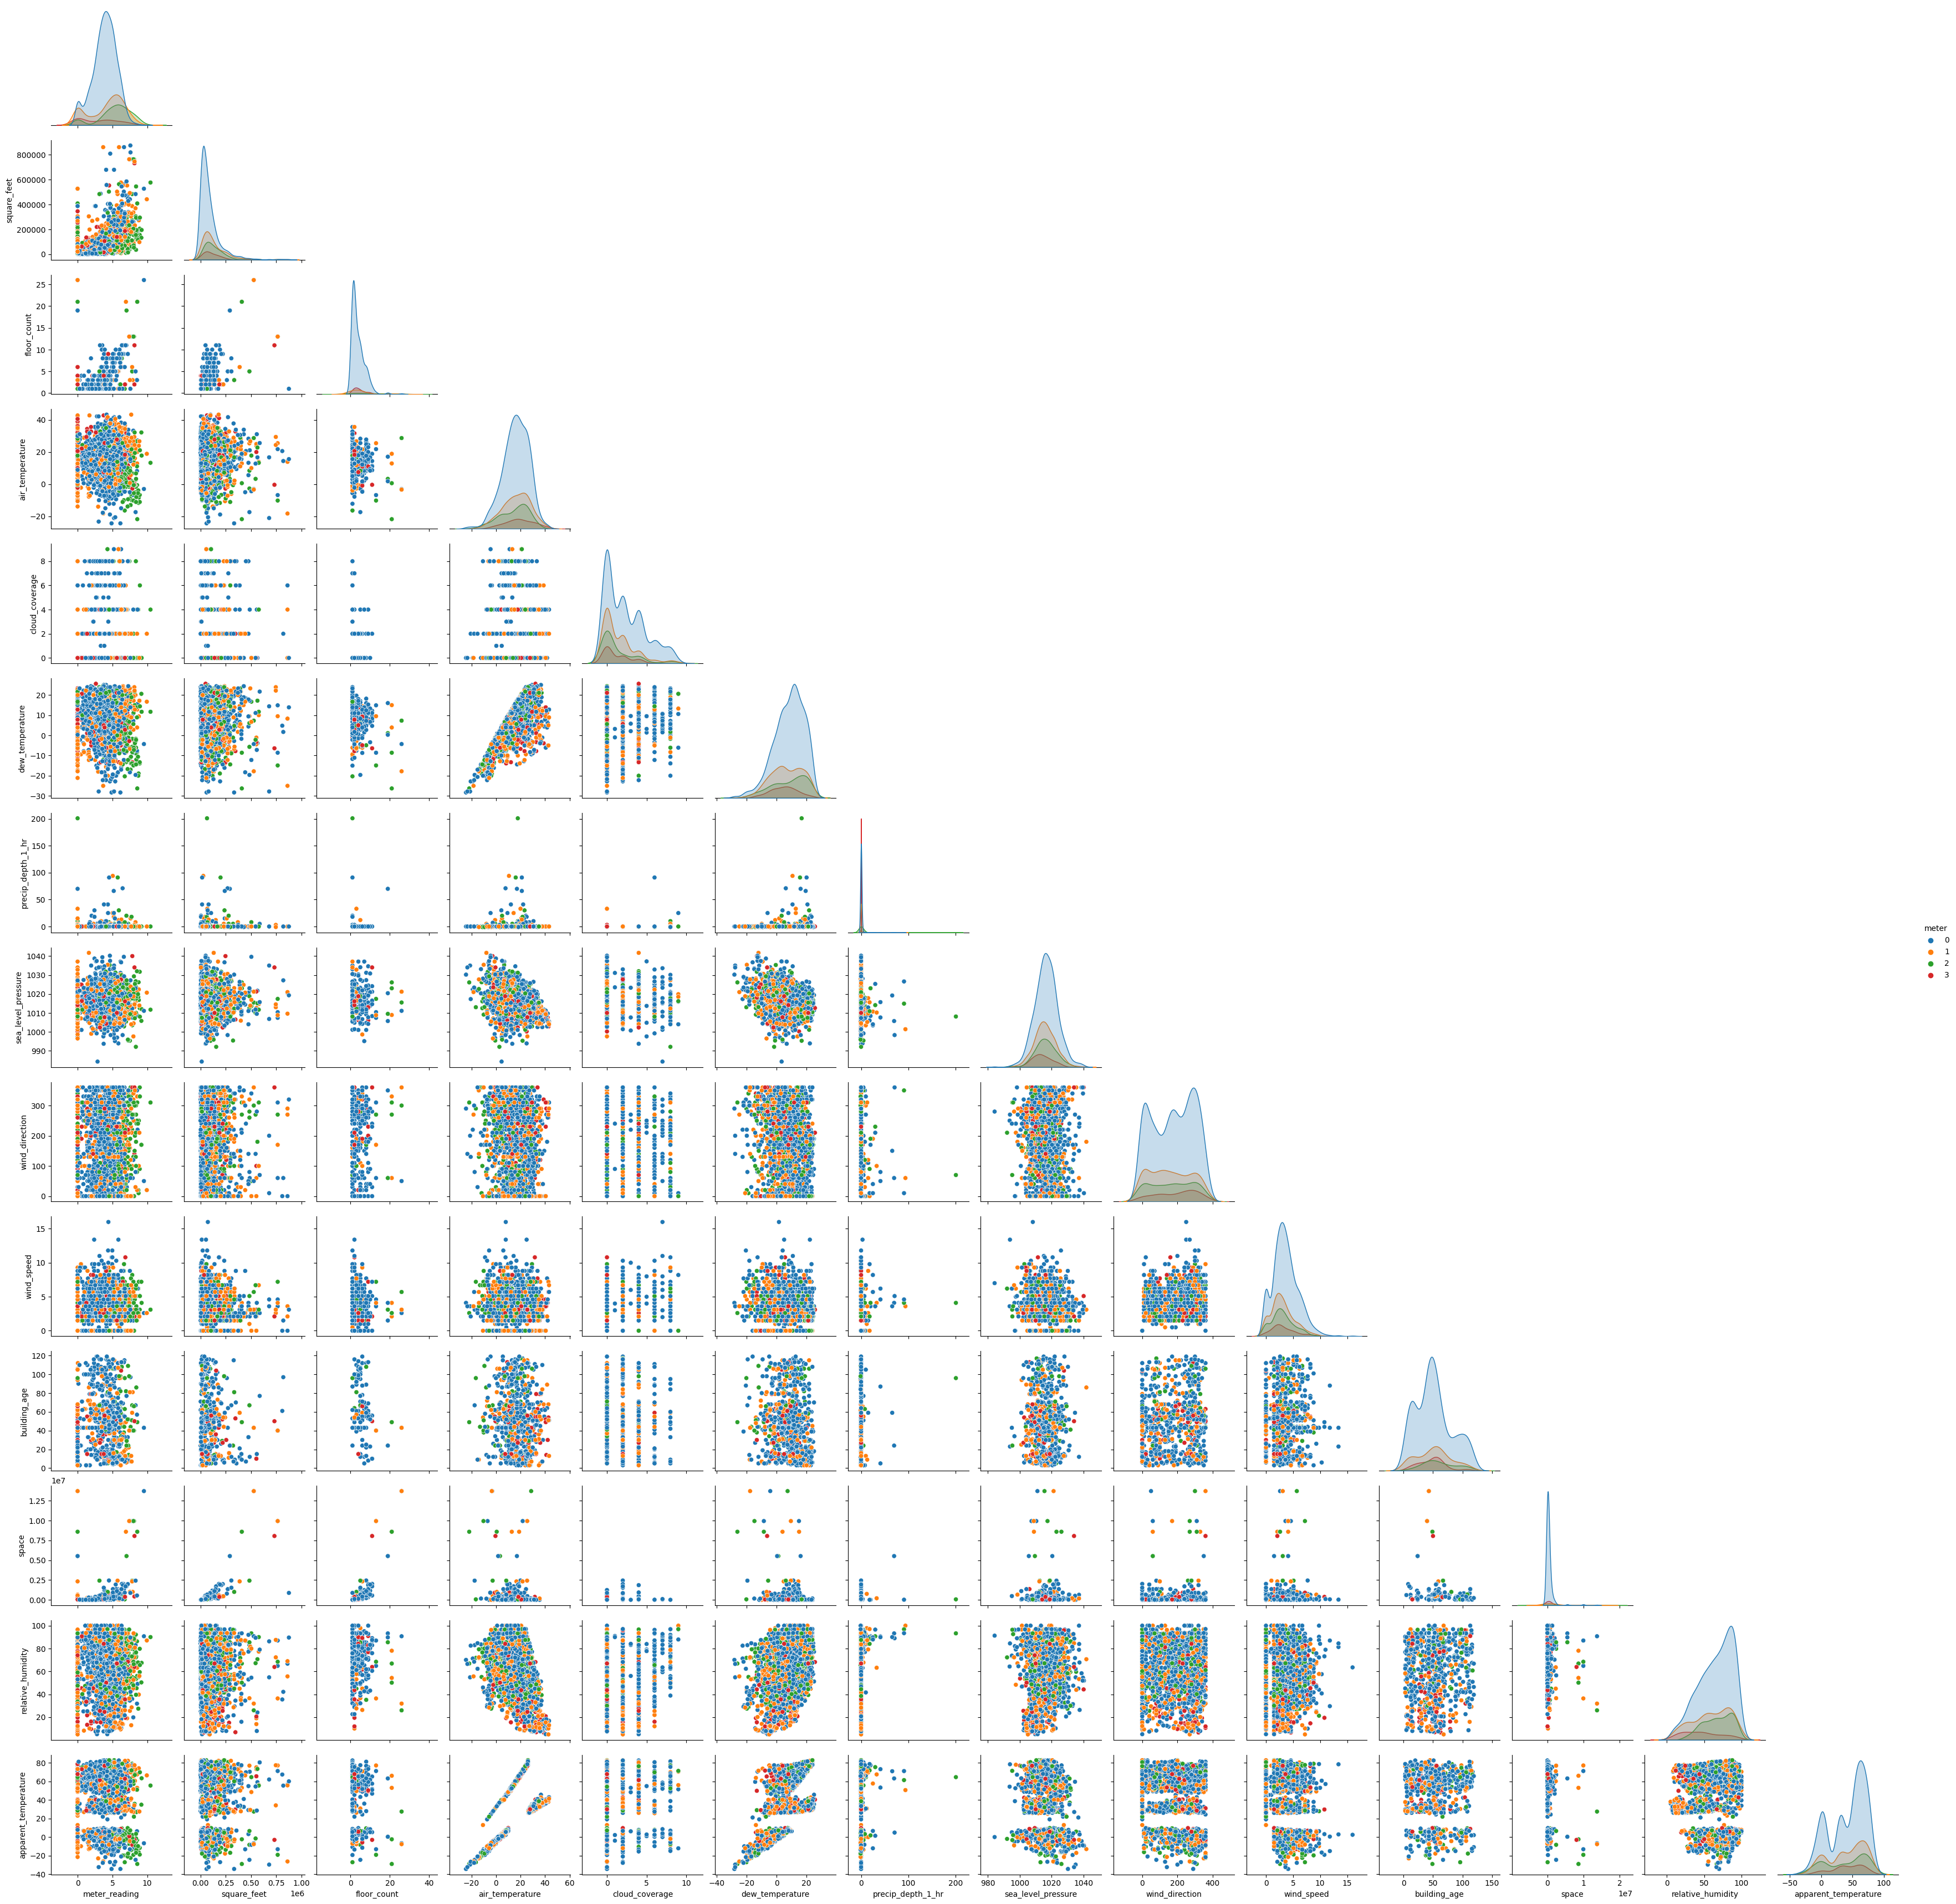

In [18]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns

# visualize numerical data
sns.pairplot(
    data=dt_merge.sample(frac=0.0001, random_state=14),
    hue='meter',
    vars=[c for c in nume_cols if not c.endswith(('_sin', '_cos'))],
    diag_kind='kde',
    corner=True,
    palette='tab10',
);

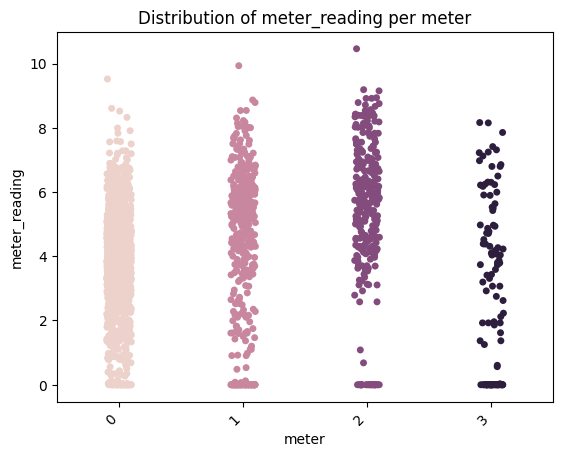

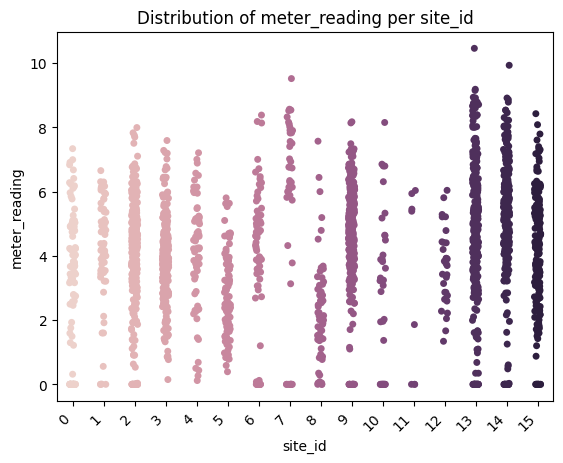

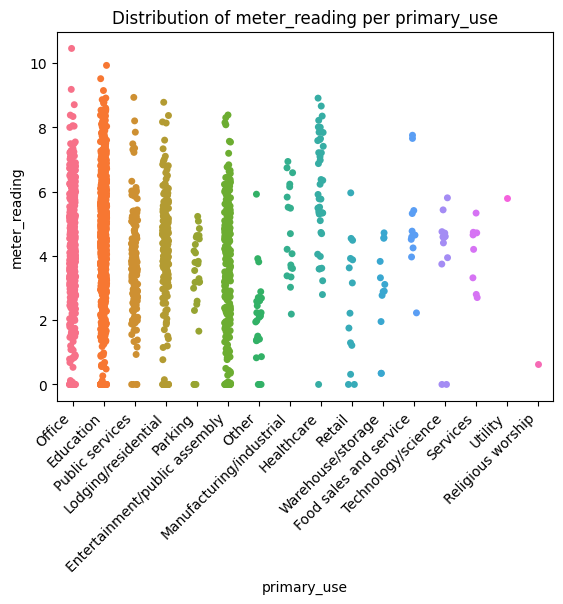

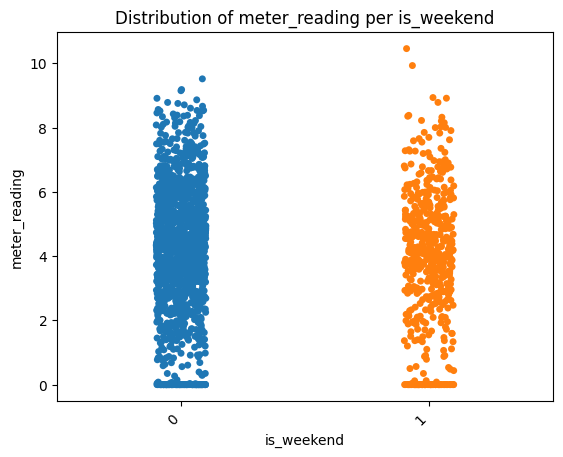

In [19]:
# visualize categorical data
for col in ['meter', 'site_id', 'primary_use', 'is_weekend']:
    sns.stripplot(
        data=dt_merge.sample(frac=0.0001, random_state=14), 
        x=col, 
        y='meter_reading',
        hue=col,
        legend=False
    ).set(title=f'Distribution of meter_reading per {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Modeling

## Finding Best Parameters for the Model

The training data is splitted into training dan validation set of data. The model that is used in this project is XGBoost because it gives good performance for tubular data.

In [20]:
# Import packages
from sklearn.model_selection import train_test_split

# Set features and target variable
feature_cols = [c for c in nume_cols + cate_cols if c != 'meter_reading']
X = dt_merge[feature_cols] # Features
y = dt_merge['meter_reading'] # Target variable

# Split data into training and validation set
X_train, X_vat, y_train, y_vat = train_test_split(X, y, test_size=0.2, 
                                                  stratify=X['primary_use'], random_state=14)
print(X_train.shape, y_train.shape)
print(X_vat.shape, y_vat.shape)

(16172880, 26) (16172880,)
(4043220, 26) (4043220,)


In [21]:
# Import packages
from sklearn.preprocessing import OrdinalEncoder

# Define the label encoder
ordinalencoder1 = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1)

# Fit and transform data
X_train[['primary_use']] = ordinalencoder1.fit_transform(X_train[['primary_use']])
X_vat[['primary_use']] = ordinalencoder1.transform(X_vat[['primary_use']])

In [22]:
# erase unused variables
del dt1, dt2, dt_merge, hour, dayofweek, week, month, dt_met, X, y

In [23]:
# Import packages
from xgboost import XGBRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error

# Finding the best parameters for the model
parameters = {'max_depth':[8,9], 
              'min_child_weight':[3,4], 
              'random_state':[14]}

grid = ParameterGrid(parameters)
best_param = None
model = None
error = np.inf

for param in grid:
    xgr = XGBRegressor(**param)
    xgr.fit(X_train, y_train)
    y_pred_train = xgr.predict(X_train)
    y_pred_vat = xgr.predict(X_vat)
    train_error = mean_squared_error(y_train, y_pred_train, squared = False)
    vat_error = mean_squared_error(y_vat, y_pred_vat, squared = False)
    
    if error >= vat_error:
        best_param = param
        model = xgr
        error = vat_error
        
    print('Parameter:', param)
    print('Train RMSLE:', train_error)
    print('Validation RMSLE:', vat_error)
    print()

print('Best parameter:', best_param)

Parameter: {'max_depth': 8, 'min_child_weight': 3, 'random_state': 14}
Train RMSLE: 0.8671079209276836
Validation RMSLE: 0.8685210439809543

Best parameter: {'max_depth': 8, 'min_child_weight': 3, 'random_state': 14}


In [24]:
# erase unused variables
del X_train, y_train, X_vat, y_vat

## Model Fitting

The testing data is imported and fitted to the model to make prediction of energy usage.

In [25]:
# define function for testing data pre-processing
def feat_eng(df):
    hour = df['timestamp'].dt.hour
    dayofweek = df['timestamp'].dt.dayofweek
    week = df['timestamp'].dt.isocalendar().week.astype(int)
    month = df['timestamp'].dt.month
    df['is_weekend'] = (dayofweek > 4).astype(int)
    
    df['hour_sin'] = np.sin(2 * np.pi * hour / 24)
    df['hour_cos'] = np.cos(2 * np.pi * hour / 24)
    df['dayofweek_sin'] = np.sin(2 * np.pi * dayofweek / 7)
    df['dayofweek_cos'] = np.cos(2 * np.pi * dayofweek / 7)
    df['week_sin'] = np.sin(2 * np.pi * week / 52)
    df['week_cos'] = np.cos(2 * np.pi * week / 52)
    df['month_sin'] = np.sin(2 * np.pi * month / 12)
    df['month_cos'] = np.cos(2 * np.pi * month / 12)
    
    df['building_age'] = 2019 - df['year_built']
    df['space'] = df['square_feet'] * df['floor_count']
    #df['wind_direction_sin'] = np.sin(2 * np.pi * df['wind_direction'] / 360)
    #df['wind_direction_cos'] = np.cos(2 * np.pi * df['wind_direction'] / 360)
    
    df = df.drop(['timestamp', 'year_built'#, 'wind_direction'
                 ], axis=1)
    
    temp = pandas_dataframe_to_unit_arrays(
        df[['air_temperature', 'dew_temperature', 'wind_speed']],
        column_units={
            'air_temperature': units.degC,
            'dew_temperature': units.degC,
            'wind_speed': units('m/s')
        }
    )

    temp['relative_humidity'] = relative_humidity_from_dewpoint(
        temp['air_temperature'],
        temp['dew_temperature']
    ).to('percent')

    temp['apparent_temperature'] = apparent_temperature(
        temp['air_temperature'], 
        temp['relative_humidity'], 
        temp['wind_speed']
    ).to('degC')

    df['relative_humidity'] = temp['relative_humidity']
    df['apparent_temperature'] = temp['apparent_temperature']
    
#     df.loc[df['site_id']==0, 'meter_reading'] = 0.2931 * df.loc[df['site_id']==0, 'meter_reading']
#     df['meter_reading'] = np.log1p(df['meter_reading'])
    df[['primary_use']] = ordinalencoder1.transform(df[['primary_use']])
    
    print(df.shape)
    del hour, dayofweek, week, month, temp
    return df[feature_cols]

In [26]:
# import testing data
dt1 = pd.read_csv('/kaggle/input/ashrae-energy-prediction/building_metadata.csv')
dt3 = pd.read_csv('/kaggle/input/ashrae-energy-prediction/weather_test.csv', parse_dates=['timestamp'])
dtest = pd.read_csv('/kaggle/input/ashrae-energy-prediction/test.csv', parse_dates=['timestamp'], 
                    chunksize=1e7)

row_id_test = []
y_pred_test = []

with dtest as reader:
    for chunk in reader:
        # merge the data
        dtest_merge = (chunk
                       .join(dt1.set_index('building_id'), on = 'building_id')
                       .join(dt3.set_index(['site_id', 'timestamp']), on = ['site_id', 'timestamp']))
        row_id = dtest_merge['row_id']
        site_id_0 = dtest_merge['site_id']==0
        dtest_merge = dtest_merge.drop('row_id', axis=1)
        
        X_test = feat_eng(dtest_merge)
        
        # fit the model
        y_pred = model.predict(X_test)
        y_pred = np.expm1(y_pred)
        y_pred[site_id_0] = 3.4118 * y_pred[site_id_0]
        y_pred_test += y_pred.tolist()
        row_id_test += row_id.tolist()

(10000000, 26)
(10000000, 26)
(10000000, 26)
(10000000, 26)
(1697600, 26)


In [ ]:
# save the result
samplesub = pd.DataFrame({'row_id': row_id_test, 'meter_reading':y_pred_test}).sort_values('row_id')
samplesub.to_csv('sample_submission.csv', index = False)
samplesub